In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [55]:
small_cap_stock = "DELTACORP.NS"
large_cap_stock = "ADANIGREEN.NS"

start_date = "2021-06-10"
end_date = "2023-06-10"

In [56]:
small_cap_data = yf.download(small_cap_stock, start=start_date, end=end_date)
large_cap_data = yf.download(large_cap_stock, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [57]:
def calculate_stochastic_oscillator(data, k_period=14, d_period=3):
    data['Lowest Low'] = data['Low'].rolling(window=k_period).min()
    data['Highest High'] = data['High'].rolling(window=k_period).max()
    data['%K'] = (data['Close'] - data['Lowest Low']) / (data['Highest High'] - data['Lowest Low']) * 100
    data['%D'] = data['%K'].rolling(window=d_period).mean()
    return data

small_cap_data = calculate_stochastic_oscillator(small_cap_data)
large_cap_data = calculate_stochastic_oscillator(large_cap_data)

In [58]:
def generate_stochastic_signals(data, k_threshold=20, d_threshold=20):
    signals = []
    for i in range(len(data)):
        if data['%K'][i] > k_threshold and data['%D'][i] > d_threshold:
            signals.append(1)   # Buy signal
        elif data['%K'][i] < k_threshold and data['%D'][i] < d_threshold:
            signals.append(-1)  # Sell signal
        else:
            signals.append(0)   # Hold signal
    return signals

small_cap_data['Signal'] = generate_stochastic_signals(small_cap_data)
large_cap_data['Signal'] = generate_stochastic_signals(large_cap_data)


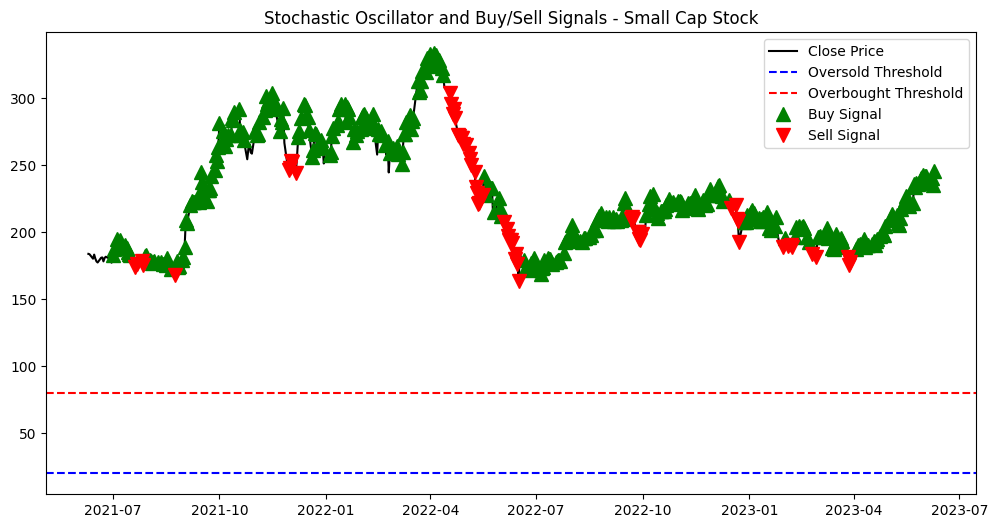

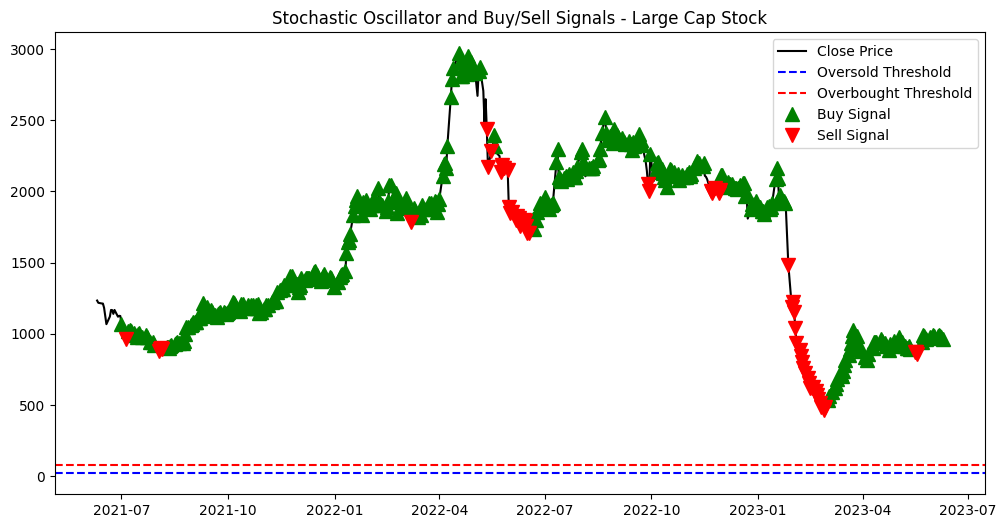

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data.index, small_cap_data['Close'], label='Close Price', color='black')
plt.axhline(y=20, color='blue', linestyle='--', label='Oversold Threshold')
plt.axhline(y=80, color='red', linestyle='--', label='Overbought Threshold')
plt.plot(small_cap_data[small_cap_data['Signal'] == 1].index, small_cap_data['Close'][small_cap_data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(small_cap_data[small_cap_data['Signal'] == -1].index, small_cap_data['Close'][small_cap_data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Stochastic Oscillator and Buy/Sell Signals - Small Cap Stock')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(large_cap_data.index, large_cap_data['Close'], label='Close Price', color='black')
plt.axhline(y=20, color='blue', linestyle='--', label='Oversold Threshold')
plt.axhline(y=80, color='red', linestyle='--', label='Overbought Threshold')
plt.plot(large_cap_data[large_cap_data['Signal'] == 1].index, large_cap_data['Close'][large_cap_data['Signal'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(large_cap_data[large_cap_data['Signal'] == -1].index, large_cap_data['Close'][large_cap_data['Signal'] == -1], 'v', markersize=10, color='r', label='Sell Signal')
plt.title('Stochastic Oscillator and Buy/Sell Signals - Large Cap Stock')
plt.legend()
plt.show()

In [60]:
small_cap_data['Returns'] = small_cap_data['Close'].pct_change()
large_cap_data['Returns'] = large_cap_data['Close'].pct_change()

small_cap_data['Cumulative Returns'] = (1 + small_cap_data['Returns']).cumprod()
large_cap_data['Cumulative Returns'] = (1 + large_cap_data['Returns']).cumprod()

risk_free_rate = 0.05   # Assume a 5% annual risk-free rate
trading_days_per_year = 252   # Assuming 252 trading days in a year
small_cap_sharpe_ratio = (small_cap_data['Returns'].mean() - risk_free_rate) / (small_cap_data['Returns'].std() * np.sqrt(trading_days_per_year))
large_cap_sharpe_ratio = (large_cap_data['Returns'].mean() - risk_free_rate) / (large_cap_data['Returns'].std() * np.sqrt(trading_days_per_year))

initial_capital = 100000

small_cap_data['Portfolio Value'] = initial_capital * (1 + small_cap_data['Returns'] * small_cap_data['Signal'].shift(1)).cumprod()
large_cap_data['Portfolio Value'] = initial_capital * (1 + large_cap_data['Returns'] * large_cap_data['Signal'].shift(1)).cumprod()


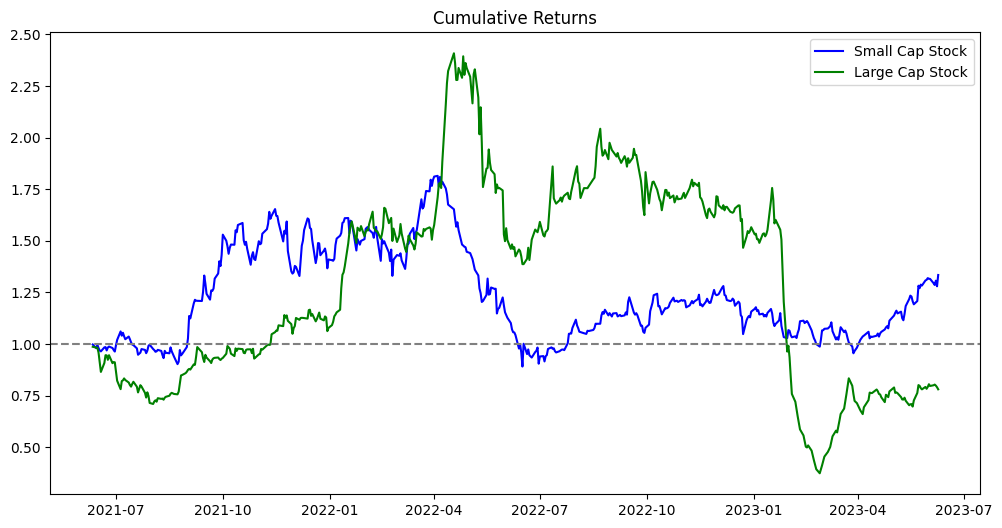

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(small_cap_data.index, small_cap_data['Cumulative Returns'], label='Small Cap Stock', color='b')
plt.plot(large_cap_data.index, large_cap_data['Cumulative Returns'], label='Large Cap Stock', color='g')
plt.axhline(y=1, color='gray', linestyle='--')
plt.title('Cumulative Returns')
plt.legend()
plt.show()

small_cap_portfolio_sharpe_ratio = (small_cap_data['Returns'] * small_cap_data['Signal'].shift(1)).mean() / (small_cap_data['Returns'] * small_cap_data['Signal'].shift(1)).std() * np.sqrt(trading_days_per_year)
large_cap_portfolio_sharpe_ratio = (large_cap_data['Returns'] * large_cap_data['Signal'].shift(1)).mean() / (large_cap_data['Returns'] * large_cap_data['Signal'].shift(1)).std() * np.sqrt(trading_days_per_year)

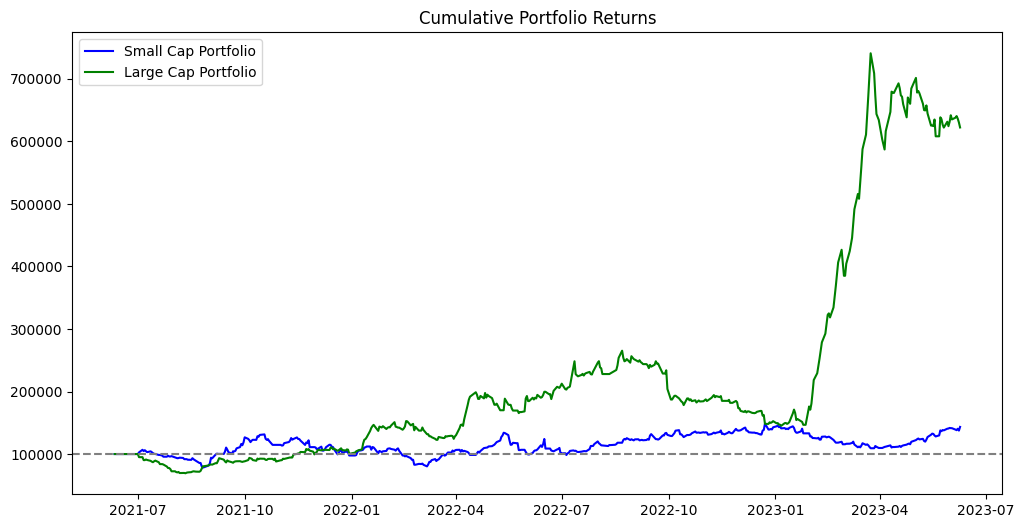

Sharpe Ratio for Small Cap Portfolio: 0.6573169791952388
Sharpe Ratio for Large Cap Portfolio: 2.0899189241497997


In [62]:

small_cap_data['Portfolio Returns'] = small_cap_data['Returns'] * small_cap_data['Signal'].shift(1)
large_cap_data['Portfolio Returns'] = large_cap_data['Returns'] * large_cap_data['Signal'].shift(1)

small_cap_data['Cumulative Portfolio Returns'] = (1 + small_cap_data['Portfolio Returns']).cumprod()
large_cap_data['Cumulative Portfolio Returns'] = (1 + large_cap_data['Portfolio Returns']).cumprod()

small_cap_data['Portfolio Value'] = initial_capital * small_cap_data['Cumulative Portfolio Returns']
large_cap_data['Portfolio Value'] = initial_capital * large_cap_data['Cumulative Portfolio Returns']


plt.figure(figsize=(12, 6))
plt.plot(small_cap_data.index, small_cap_data['Portfolio Value'], label='Small Cap Portfolio', color='b')
plt.plot(large_cap_data.index, large_cap_data['Portfolio Value'], label='Large Cap Portfolio', color='g')
plt.axhline(y=initial_capital, color='gray', linestyle='--')
plt.title('Cumulative Portfolio Returns')
plt.legend()
plt.show()

print("Sharpe Ratio for Small Cap Portfolio:", small_cap_portfolio_sharpe_ratio)
print("Sharpe Ratio for Large Cap Portfolio:", large_cap_portfolio_sharpe_ratio)


In [64]:
#small_cap_overall_return = (small_cap_data['Portfolio Value'].iloc[-1] - initial_capital) / initial_capital
large_cap_overall_return = (large_cap_data['Portfolio Value'].iloc[-1] - initial_capital) / initial_capital

#print("Overall Return for Initial Capital (Small Cap Portfolio): {:.2f}%".format(small_cap_overall_return * 100))
print("Overall Return for Initial Capital (Large Cap Portfolio): {:.2f}%".format(large_cap_overall_return * 100))


Overall Return for Initial Capital (Large Cap Portfolio): 522.34%
